In [1]:
import numpy as np

def read_ascii_to_array(filename):
    header_lines = 6
    with open(filename, 'r') as f:
        for _ in range(header_lines):
            print(f.readline().strip())

    data = np.loadtxt(filename, skiprows=header_lines)
    return data

filename = "C:/thesis/rusterizer_3d/test.asc"
array = read_ascii_to_array(filename)

print("Array shape:", array.shape)
print(array)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/thesis/rusterizer_3d/test.asc'

In [ ]:
print(arrays)

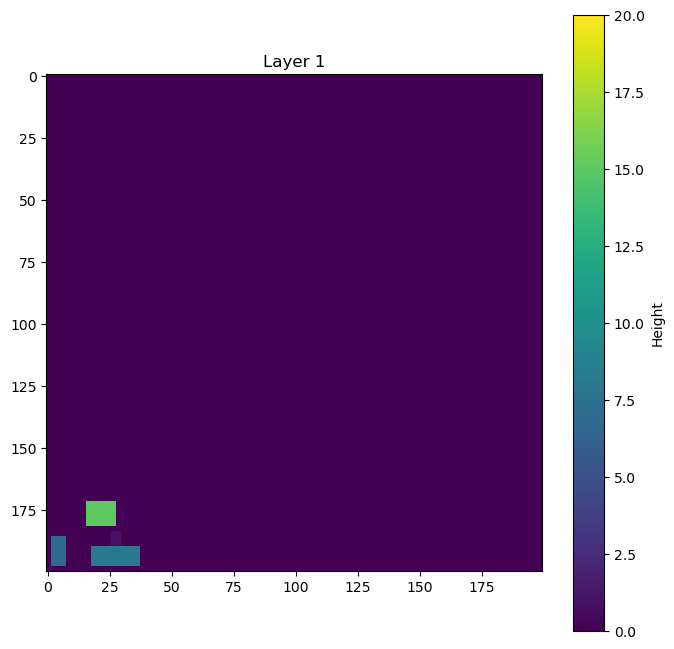

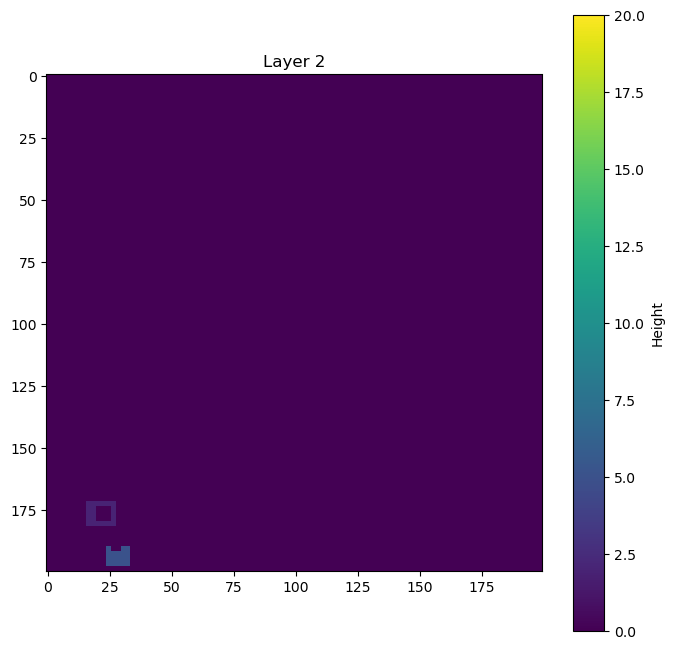

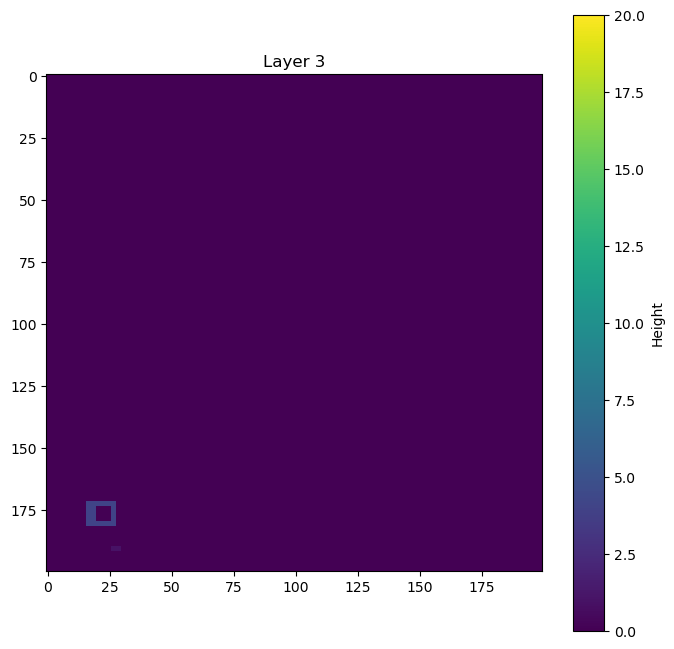

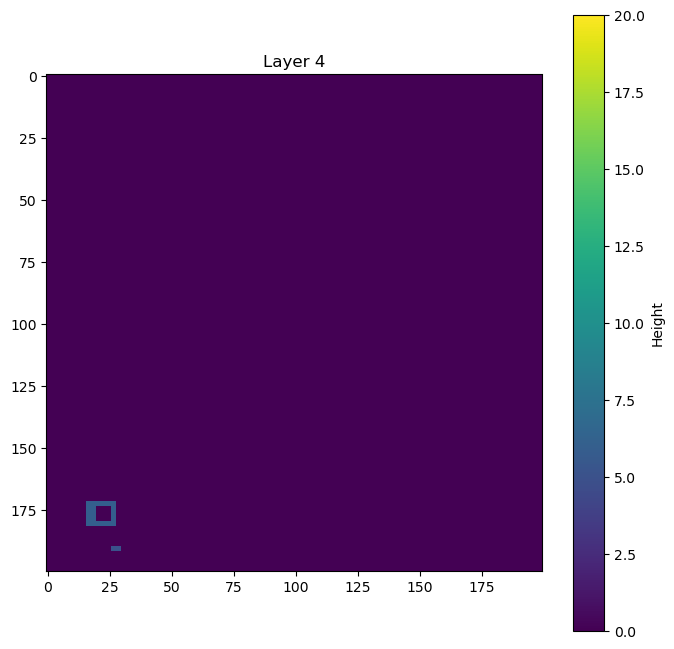

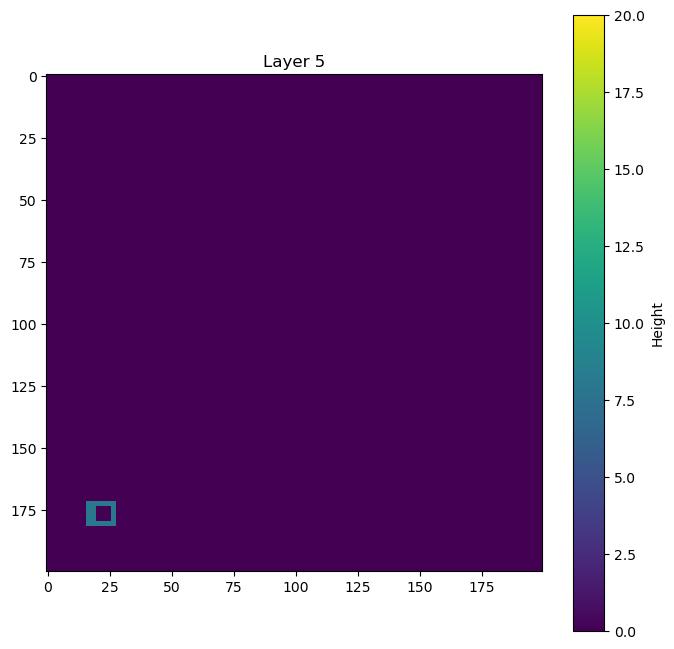

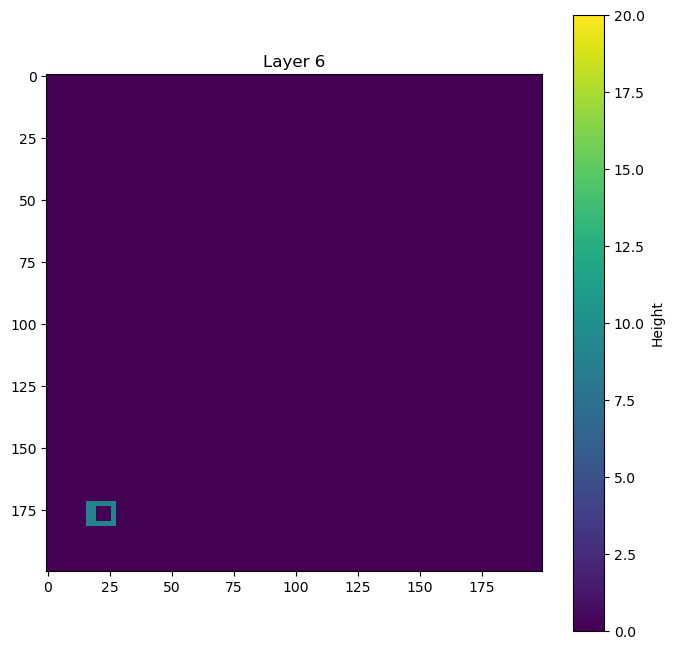

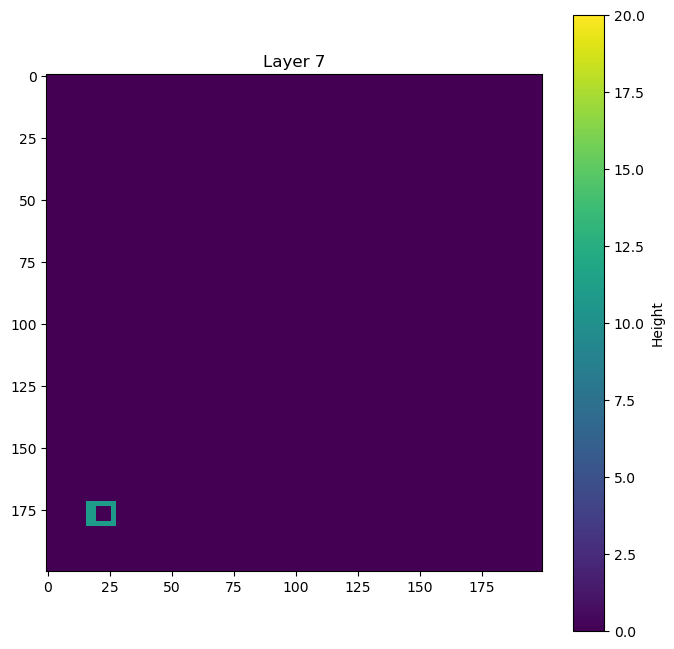

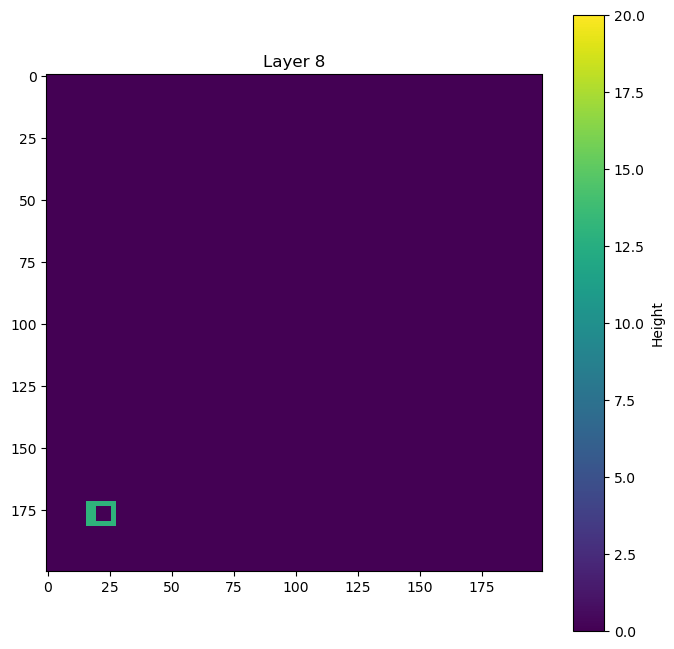

In [4]:
import matplotlib.pyplot as plt
num_layers = arrays.shape[0]

for i in range(num_layers):
    plt.figure(figsize=(8, 8))
    plt.imshow(arrays[i], cmap='viridis', interpolation='none', vmin=0, vmax=20)
    plt.colorbar(label="Height")
    plt.title(f"Layer {i+1}")
    plt.show()



In [5]:
import rasterio
from util.misc import saveraster
from osgeo import gdal


saveraster(gdal_dsm, "output/firstarray.tiff", arrays[0])
saveraster(gdal_dsm, "output/secarray.tiff", arrays[1])
saveraster(gdal_dsm, "output/thirdarray.tiff", arrays[2])

In [10]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)

dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

dsm1[~grounded_mask] = arrays[1][~grounded_mask]
dsm1[both_masks ] = arrays[3][both_masks]

dsm2[~grounded_mask] = arrays[0][~grounded_mask]
dsm2[both_masks ] = arrays[0][both_masks]

In [11]:
saveraster(gdal_dsm, "output/dsm0.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2.tiff", dsm2)

In [12]:
saveraster(gdal_dsm, "output/dsm_nogap.tiff", arrays[0])

In [16]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])

dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

dsm4[direct_gaps_valid] = arrays[0][direct_gaps_valid]
dsm4[both_masks_valid] = arrays[0][both_masks_valid]


saveraster(gdal_dsm, "output/dsm0_gaps2.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1_gaps2.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2_gaps2.tiff", dsm2)
saveraster(gdal_dsm, "output/dsm3_gaps2.tiff", dsm3)
saveraster(gdal_dsm, "output/dsm4_gaps2.tiff", dsm4)


In [36]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)
dsm5 = np.full(arrays[0].shape, np.nan)
dsm6 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])
#
dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
dsm4[both_masks_valid2] = arrays[6][both_masks_valid2]
dsm4[both_masks_fallback2] = arrays[0][both_masks_fallback2]

direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])

dsm4[direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
dsm4[direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]

# layer 5
dsm5[direct_gaps_valid2] = arrays[5][direct_gaps_valid2]
dsm5[both_masks_valid2] = arrays[7][both_masks_valid2]

# layer 6

dsm6[direct_gaps_valid2] = arrays[0][direct_gaps_valid2]
dsm6[both_masks_valid2] = arrays[0][both_masks_valid2]


saveraster(gdal_dsm, "output/dsm0_gaps3.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1_gaps3.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2_gaps3.tiff", dsm2)
saveraster(gdal_dsm, "output/dsm3_gaps3.tiff", dsm3)
saveraster(gdal_dsm, "output/dsm4_gaps3.tiff", dsm4)
saveraster(gdal_dsm, "output/dsm5_gaps3.tiff", dsm5)
saveraster(gdal_dsm, "output/dsm6_gaps3.tiff", dsm6)

In [42]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)
dsm5 = np.full(arrays[0].shape, np.nan)
dsm6 = np.full(arrays[0].shape, np.nan)
dsm7 = np.full(arrays[0].shape, np.nan)
dsm8 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])
#
dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
dsm4[both_masks_valid2] = arrays[6][both_masks_valid2]
dsm4[both_masks_fallback2] = arrays[0][both_masks_fallback2]

direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])

dsm4[direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
dsm4[direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]

# layer 5
dsm5[direct_gaps_valid2] = arrays[5][direct_gaps_valid2]
dsm5[both_masks_valid2] = arrays[7][both_masks_valid2]

# layer 6
try:
    both_masks_valid3 = both_masks_valid2 & ~np.isnan(arrays[8])
    both_masks_fallback3 = both_masks_valid2 & np.isnan(arrays[8])
    dsm6[both_masks_valid3] = arrays[8][both_masks_valid3]
    dsm6[both_masks_fallback3] = arrays[0][both_masks_fallback3]
except IndexError:
    print("Outside of list range: arrays does not have an element at index 8")

direct_gaps_valid3 = direct_gaps_valid2 & ~np.isnan(arrays[6])
direct_gaps_fallback3 = direct_gaps_valid2 & np.isnan(arrays[6])

dsm6[direct_gaps_valid3] = arrays[6][direct_gaps_valid3]
dsm6[direct_gaps_fallback3] = arrays[0][direct_gaps_fallback3]

# layer 7
dsm7[direct_gaps_valid3] = arrays[7][direct_gaps_valid3]
if len(arrays) > 8:
    dsm7[both_masks_valid3] = arrays[9][both_masks_valid3]

# layer 8
dsm8[direct_gaps_valid3] = arrays[0][direct_gaps_valid3]
if len(arrays) > 8:
    dsm8[both_masks_valid3] = arrays[0][both_masks_valid3]

saveraster(gdal_dsm, "output/gapstesting/dsm0_gaps4.tiff", dsm0)
saveraster(gdal_dsm, "output/gapstesting/dsm1_gaps4.tiff", dsm1)
saveraster(gdal_dsm, "output/gapstesting/dsm2_gaps4.tiff", dsm2)
saveraster(gdal_dsm, "output/gapstesting/dsm3_gaps4.tiff", dsm3)
saveraster(gdal_dsm, "output/gapstesting/dsm4_gaps4.tiff", dsm4)
saveraster(gdal_dsm, "output/gapstesting/dsm5_gaps4.tiff", dsm5)
saveraster(gdal_dsm, "output/gapstesting/dsm6_gaps4.tiff", dsm6)
saveraster(gdal_dsm, "output/gapstesting/dsm7_gaps4.tiff", dsm7)
saveraster(gdal_dsm, "output/gapstesting/dsm8_gaps4.tiff", dsm8)

Outside of list range: arrays does not have an element at index 8


In [5]:
import numpy as np
from util.misc import saveraster
from osgeo import gdal
# gdal_dsm = gdal.Open("D:/Geomatics/thesis/_3drust/testing.tif")
gdal_dsm = gdal.Open("../j_dataprep/output/dsm_new_new.tif")
def buildings_input(arrays, num_gaps):
    if num_gaps == 0:
        return arrays[0], arrays[0]

    layers = num_gaps * 2 + 1

    if layers > len(arrays) + 1:
        f"Amount of gaps is too high for the given input. "
        return

    dsms = np.full((layers, arrays[0].shape[0], arrays[0].shape[1]), np.nan)
    arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
    grounded_mask = arrays[1] == 0
    direct_gaps = ~grounded_mask
    gaps = arrays[3] > 0
    both_masks = grounded_mask & gaps

    dsms[0][grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

    if num_gaps == 1:
        dsms[1][direct_gaps] = arrays[1][direct_gaps]
        dsms[1][both_masks ] = arrays[3][both_masks]

        dsms[2][direct_gaps] = arrays[0][direct_gaps]
        dsms[2][both_masks ] = arrays[0][both_masks]

        return dsms, arrays[0]

    if num_gaps > 1:
        # layer 1
        dsms[1][direct_gaps] = arrays[1][direct_gaps]
        dsms[1][both_masks] = arrays[3][both_masks]

        direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
        direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

        if 4 < len(arrays):
            both_masks_valid = both_masks & ~np.isnan(arrays[4])

        for i in range(1, num_gaps):
            j = 2 * i
            new_direct_valid = direct_gaps_valid & ~np.isnan(arrays[j])
            new_direct_fallback = direct_gaps_valid & np.isnan(arrays[j])

            dsms[j][new_direct_valid] = arrays[j][new_direct_valid]
            dsms[j][new_direct_fallback] = arrays[0][new_direct_fallback]

            if j + 1 < len(arrays):
                dsms[j + 1][new_direct_valid] = arrays[j + 1][new_direct_valid]

            # For both_masks
            if j + 2 < len(arrays):
                new_both_valid = both_masks_valid & ~np.isnan(arrays[j + 2])
                new_both_fallback = both_masks_valid & np.isnan(arrays[j + 2])

                dsms[j][new_both_valid] = arrays[j + 2][new_both_valid]
                dsms[j][new_both_fallback] = arrays[0][new_both_fallback]

                if j + 3 < len(arrays):
                    dsms[j + 1][new_both_valid] = arrays[j + 3][new_both_valid]

            # Update masks for next iteration
            direct_gaps_valid = new_direct_valid
            both_masks_valid = new_both_valid if j + 2 < len(arrays) else both_masks_valid


        # final layer
        dsms[layers - 1][direct_gaps_valid] = arrays[0][direct_gaps_valid]
        dsms[layers - 1][both_masks_valid] = arrays[0][both_masks_valid]

        return dsms, arrays[0]


In [37]:
def buildings_direct_input(arrays, num_gaps):
    if num_gaps == 0:
        return arrays[0], arrays[0]

    layers = num_gaps * 2 + 1

    if layers > len(arrays) + 1:
        f"Amount of gaps is too high for the given input. "
        return

    dsms = np.full((layers, arrays[0].shape[0], arrays[0].shape[1]), np.nan)
    arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
    grounded_mask = arrays[1] == 0
    direct_gaps = ~grounded_mask

    dsms[0][grounded_mask] =  arrays[0][grounded_mask]

    if num_gaps == 1:
        dsms[1][direct_gaps] = arrays[1][direct_gaps]
        dsms[2][direct_gaps] = arrays[0][direct_gaps]
        return dsms, arrays[0]

    if num_gaps > 1:
        # layer 1
        dsms[1][direct_gaps] = arrays[1][direct_gaps]

        direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
        direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

        for i in range(1, num_gaps):
            j = 2 * i
            new_direct_valid = direct_gaps_valid & ~np.isnan(arrays[j])
            new_direct_fallback = direct_gaps_valid & np.isnan(arrays[j])

            dsms[j][new_direct_valid] = arrays[j][new_direct_valid]
            dsms[j][new_direct_fallback] = arrays[0][new_direct_fallback]

            if j + 1 < len(arrays):
                dsms[j + 1][new_direct_valid] = arrays[j + 1][new_direct_valid]

            # Update masks for next iteration
            direct_gaps_valid = new_direct_valid

        # final layer
        dsms[layers - 1][direct_gaps_valid] = arrays[0][direct_gaps_valid]


        return dsms, arrays[0]

In [22]:
from rusterizer_3d import rasterize_from_python

arrays = rasterize_from_python("D:/Geomatics/thesis/objtryouts/amsterdamsit.obj", 798, 598, 0.5, [0,0], -9999)
print(arrays.shape)

(2, 598, 798)


In [24]:
import matplotlib.pyplot as plt
def plot_raster(array, title="DSM original"):
        plt.figure(figsize=(10, 8), facecolor="white")
        ax = plt.gca()
        ax.set_facecolor("white")
        plt.imshow(array, cmap="viridis", origin="upper", vmin=-10, vmax=50)
        plt.colorbar(label="Elevation (m)")
        plt.title(title)
        plt.show()

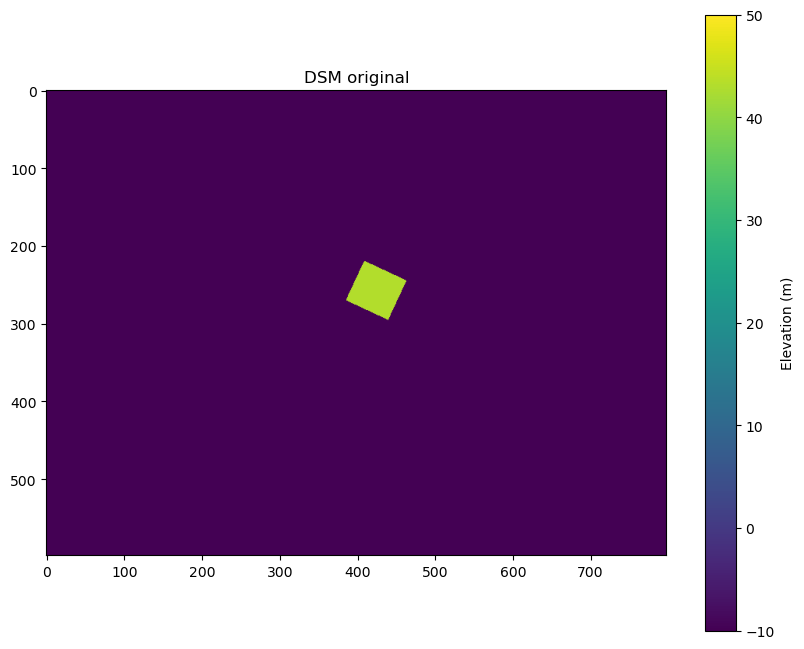

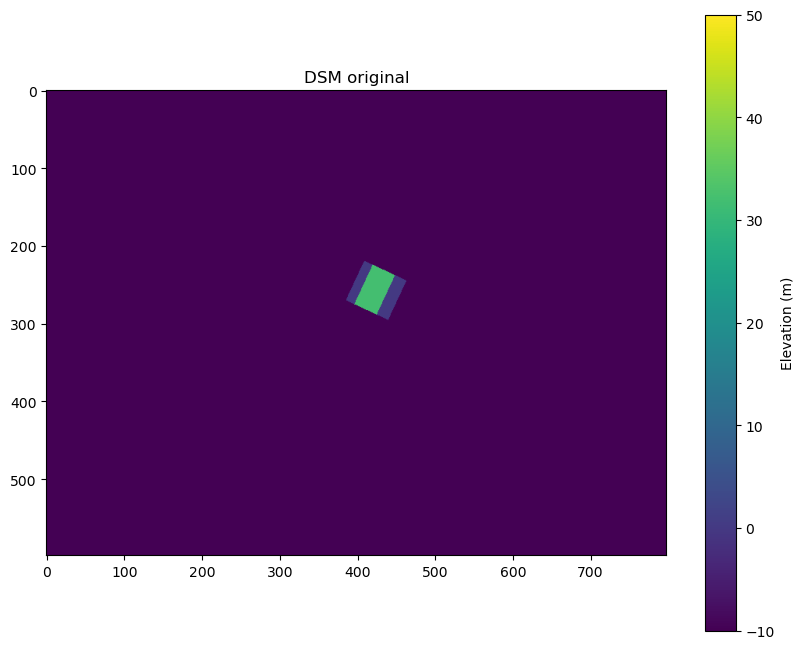

In [25]:
plot_raster(arrays[0])
plot_raster(arrays[1])

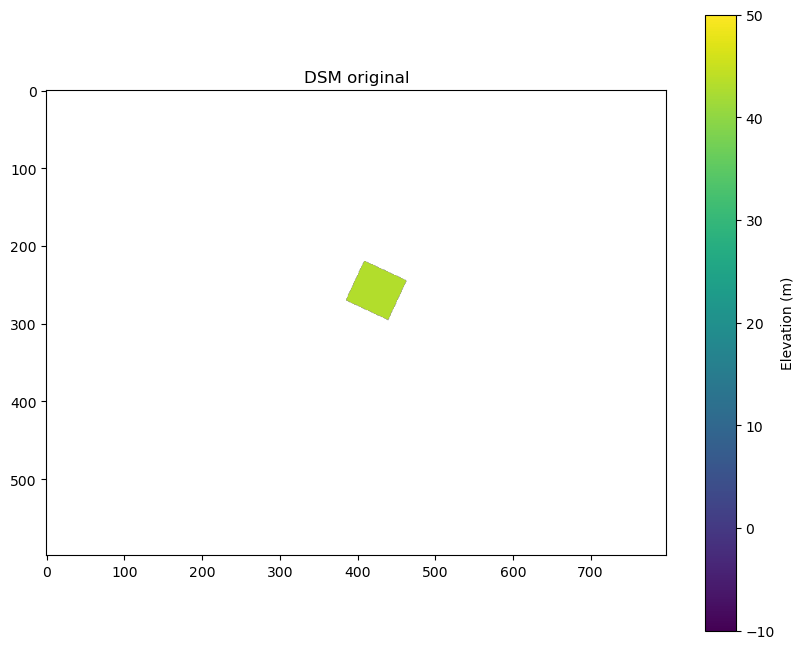

In [40]:
num_gaps = 1  # Set number of gaps (layers) to generate
array = gdal_dsm.GetRasterBand(1).ReadAsArray()
dsm_result, highest_array = buildings_direct_input(arrays, num_gaps)
plot_raster(highest_array)


# Saving each layer as raster (dsm0 to dsmN)
# for i in range(dsm_result.shape[0]):
#    saveraster(gdal_dsm, f"output/dsm{i}_gaps{num_gaps}.tiff", dsm_result[i])
saveraster(gdal_dsm, f"output/ams_test0.tiff", dsm_result[0])
saveraster(gdal_dsm, f"output/ams_test1.tiff", dsm_result[1])
saveraster(gdal_dsm, f"output/ams_test2.tiff", dsm_result[2])
saveraster(gdal_dsm, "output/ams_highest.tiff", highest_array)

NameError: name 'gdal' is not defined

In [7]:
print(arrays)

[[[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  ...
  [-9.999e+03 -9.999e+03  7.000e+00 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]]

 [[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  ...
  [-9.999e+03 -9.999e+03  0.000e+00 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]]

 [[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+

# USING RUSTERIZER FOR CAD

In [43]:
from rusterizer_3d import rasterize_from_python

surface = rasterize_from_python("D:/Geomatics/thesis/objtryouts/water.obj", 798, 598, 0.5, [0,0], -9999)

In [44]:
print(surface)

[[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  ...
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]]

 [[-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  ...
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]]]


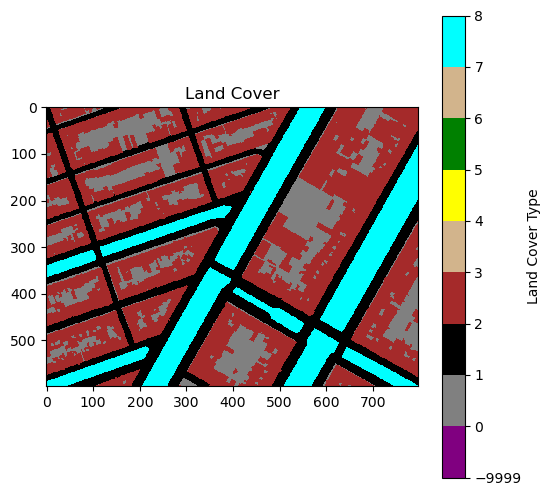

File written to 'D:/Geomatics/thesis/oldwallvsnewwallmethod/option2/landcover.tif'
Exported data to output/export_test2.dxf


In [53]:
import requests
import json
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import shape, mapping, Polygon, MultiPolygon, LineString, MultiLineString
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import ezdxf
import json
from shapely.affinity import translate

class LandCover:
    def __init__(self, bbox, crs, resolution=0.5,building_data=None, dataset_path=None, buildings_path=None, layer=None, landcover_path="landcover.json"):
        self.bbox = bbox
        self.crs = crs
        self.resolution = resolution
        # TO DO: change dataset path to dataset instance itself
        self.dtm_dataset = dataset_path
        self.base_url = "https://api.pdok.nl/brt/top10nl/ogc/v1"

        self.buildings_path = buildings_path
        self.layer = layer
        self.building_data = building_data

        self.landcover_path = landcover_path
        self.landcover_mapping = self.load_landcover_mapping()

        self.buildings = None
        self.water = None
        self.roads = None
        self.terrains = None
        self.get_features()

        self.array = self.convert_to_raster()
        self.og_landcover = self.array
        self.landcover_withoutbuild = None
        self.transform = None




    def load_landcover_mapping(self):
        """Load land cover mappings from a JSON file with explicit UTF-8 encoding."""
        with open(self.landcover_path, "r", encoding="utf-8", errors="replace") as f:
            return json.load(f)

    def get_landcover_code(self, land_type, isroad=False):
        """Retrieve land cover code by type."""
        category = "road" if isroad else "terrain"
        return self.landcover_mapping.get(category, {}).get(land_type.lower(), -1)

    def get_top10nl(self, item_type):
        url = f"{self.base_url}/collections/{item_type}/items?bbox={self.bbox[0]},{self.bbox[1]},{self.bbox[2]},{self.bbox[3]}&bbox-crs={self.crs}&crs={self.crs}&limit=1000&f=json"
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return {}

    def process_water_features(self):
        waterdata_vlak = self.get_top10nl("waterdeel_vlak")
        waterdata_lijn = self.get_top10nl("waterdeel_lijn")
        water_features = []

        for wat in waterdata_vlak.get("features", []):
            geom = shape(wat['geometry'])
            properties = wat.get("properties", {})
            if properties.get("hoogteniveau") != -1 and isinstance(geom, (Polygon, MultiPolygon)):
                water_features.append({"type": "Feature", "geometry": mapping(geom), "properties": properties})

        for wat in waterdata_lijn.get("features", []):
            geom = shape(wat['geometry']).buffer(0.75)
            properties = wat.get("properties", {})
            if properties.get("hoogteniveau") != -1 and isinstance(geom, (Polygon, MultiPolygon)):
                water_features.append({"type": "Feature", "geometry": mapping(geom), "properties": properties})

        return water_features

    def process_terrain_features(self):
        terreindata = self.get_top10nl("terrein_vlak")
        terrain_features = []

        landuse_terrain_mapping = self.landcover_mapping.get("terrain", {})

        for ter in terreindata.get("features", []):
            geom = shape(ter['geometry'])
            properties = ter.get("properties", {})
            landusetype = properties.get("typelandgebruik", "").lower()
            landuse_value = landuse_terrain_mapping.get(landusetype, -1)

            new_properties = {"landuse": landuse_value} if landuse_value != -1 else {}

            if isinstance(geom, (Polygon, MultiPolygon)):
                terrain_features.append({
                    "type": "Feature",
                    "geometry": mapping(geom),
                    "properties": new_properties
                })



        return terrain_features

    def process_road_features(self):
        wegdata = self.get_top10nl("wegdeel_vlak")
        road_features = []

        landuse_road_mapping = self.landcover_mapping.get("road", {})

        for road in wegdata.get("features", []):
            geom = shape(road['geometry'])
            properties = road.get("properties", {})

            verhardingstype = properties.get("verhardingstype", "").lower()
            landuse_value = landuse_road_mapping.get(verhardingstype, -1)

            new_properties = {"landuse": landuse_value} if landuse_value != -1 else {}

            if isinstance(geom, (Polygon, MultiPolygon)):
                road_features.append({
                    "type": "Feature",
                    "geometry": mapping(geom),
                    "properties": new_properties
                })

        return road_features

    def get_features(self):
        self.terrains = self.process_terrain_features()
        self.roads = self.process_road_features()
        self.water = self.process_water_features()
        self.buildings = self.load_buildings()


    def load_buildings(self):
        if self.building_data is not None:
            return self.building_data
        elif not self.buildings_path or not self.layer:
            return []
        buildings_gdf = gpd.read_file(self.buildings_path, layer=self.layer)
        return [{"geometry": mapping(geom), "parcel_id": identificatie} for geom, identificatie in
                zip(buildings_gdf.geometry, buildings_gdf["identificatie"])]

    def visualize_raster(self, raster_array):
        cmap = ListedColormap(["purple", "grey", "black", "brown", "tan", "yellow", "green", "tan", "cyan"])
        categories = [-9999, 0, 1, 2, 3, 4, 5, 6, 7, 8]
        norm = BoundaryNorm(categories, cmap.N)
        plt.figure(figsize=(6, 6))
        img = plt.imshow(raster_array, cmap=cmap, norm=norm, interpolation='nearest')
        cbar = plt.colorbar(img, ticks=categories)
        cbar.set_label("Land Cover Type")
        plt.title("Land Cover")
        plt.show()

    def convert_to_raster(self):
        with rasterio.open(self.dtm_dataset) as dst:
            array = dst.read(1)
            transform = dst.transform
            self.transform = transform

        array.fill(-9999)

        for ter in self.terrains:
            geom = shape(ter['geometry'])
            landuse = ter['properties'].get('landuse', None)
            if landuse is not None:
                landuse_mask = geometry_mask([geom], transform=transform, invert=False, out_shape=array.shape)
                array = np.where(landuse_mask, array, landuse)

        for road in self.roads:
            geom = shape(road['geometry'])
            landuse_road = road['properties'].get('landuse', None)
            if landuse_road is not None:
                road_mask = geometry_mask([geom], transform=transform, invert=False, out_shape=array.shape)
                array = np.where(road_mask, array, landuse_road)

        water_geometries = [shape(wat['geometry']) if isinstance(shape(wat['geometry']),
                                                                             (LineString, MultiLineString)) else shape(
            wat['geometry']) for wat in self.water]
        if not water_geometries:
            print("No valid water geometries found. Skipping water rasterization.")
        else:
            water_mask = geometry_mask(water_geometries, transform=transform, invert=False, out_shape=array.shape)
            array = np.where(water_mask, array, 7)

        self.landcover_withoutbuild = array

        building_geometries = [shape(building['geometry']) for building in self.buildings]
        if not building_geometries:
            print("No valid building geometries found. Skipping building rasterization.")
        else:
            building_mask = geometry_mask(building_geometries, transform=transform, invert=False, out_shape=array.shape)
            array = np.where(building_mask, array, 2)

        self.visualize_raster(array)
        return array

    def save_raster(self, name, change_nodata):
        with rasterio.open(self.dtm_dataset) as dst:
            transform = dst.transform
            crs = dst.crs
            nodata = dst.nodata

        output_file = name
        output = self.array
        output = np.squeeze(output)
        # Set the nodata value: use -9999 if nodata_value is True or dataset does not have nodata.
        if change_nodata:
            nodata_value = -9999
        else:
            try:
                # TO DO: CHANGE THIS TO JUST INPUTTING A NODATA VALUE, NO NEED FOR THE WHOLE DATASET IN THIS FUNCTION
                nodata_value = nodata
                if nodata_value is None:
                    raise AttributeError("No no data value found in dataset.")
            except AttributeError as e:
                print(f"Warning: {e}. Defaulting to -9999.")
                nodata_value = -9999

        # output the dataset
        with rasterio.open(output_file, 'w',
                           driver='GTiff',
                           height=output.shape[0],  # Assuming output is (rows, cols)
                           width=output.shape[1],
                           count=1,
                           dtype=np.float32,
                           crs=crs,
                           nodata=nodata_value,
                           transform=transform) as dst:
            dst.write(output, 1)
        print("File written to '%s'" % output_file)

    def update_build_landcover(self, new_building_data):
        building_geometries = [shape(building['geometry']) for building in new_building_data]
        if not building_geometries:
            print("No valid building geometries found. Skipping building rasterization.")
        else:
            building_mask = geometry_mask(building_geometries, transform=self.transform, invert=False,
                                          out_shape=self.array.shape)
            self.array = np.where(building_mask, self.array, 2)

    def update_landcover(self, type, input_array):
        to_update = input_array > -1
        self.array[to_update] = type


    def export_context(self, file_name, export_format="dxf"):

        bbox = np.array(self.bbox) + np.array([self.resolution, self.resolution, -self.resolution, -self.resolution])
        xmin, ymin, xmax, ymax = bbox

        # Normalize bounding box where (0,0) is at lower-left
        normalized_bbox = {
            "xmin": 0,
            "ymin": 0,
            "xmax": xmax - xmin,
            "ymax": ymax - ymin
        }

        # Normalize building geometries
        transformed_buildings = []
        for building in self.buildings:
            if "geometry" in building:
                geom = shape(building["geometry"])
                shifted_geom = translate(geom, xoff=-xmin, yoff=-ymin)

                transformed_buildings.append({
                    "geometry": mapping(shifted_geom),
                    "parcel_id": building["parcel_id"]
                })

        transformed_water = []
        transformed_roads = []
        transformed_terrain = []

        def transform_features(features, target_list):
            for feature in features:
                geom = shape(feature["geometry"])
                shifted_geom = translate(geom, xoff=-xmin, yoff=-ymin)
                target_list.append({
                    "geometry": mapping(shifted_geom),
                    "properties": feature["properties"]
                })

        transform_features(self.water, transformed_water)
        transform_features(self.roads, transformed_roads)
        transform_features(self.terrains, transformed_terrain)

        data = {
            "dsm_bbox": normalized_bbox,
            "buildings": transformed_buildings,
            "water": transformed_water,
            "roads": transformed_roads,
            "terrain": transformed_terrain
        }

        if export_format == "json":
            with open(file_name, "w") as f:
                json.dump(data, f, indent=4)
            print(f"Exported data to {file_name}")

        elif export_format == "csv":
            import csv
            with open(file_name, "w", newline="") as f:
                writer = csv.writer(f)
                writer.writerow(["type", "geometry", "properties"])
                for category, features in [("building", transformed_buildings),
                                           ("water", transformed_water),
                                           ("road", transformed_roads),
                                           ("terrain", transformed_terrain)]:
                    for feature in features:
                        writer.writerow([category, json.dumps(feature["geometry"]), json.dumps(feature["properties"])])
            print(f"Exported data to {file_name}")

        elif export_format == "dxf":
            doc = ezdxf.new()
            msp = doc.modelspace()

            # Add bounding box as a rectangle
            msp.add_lwpolyline([(0, 0), (normalized_bbox["xmax"], 0),
                                (normalized_bbox["xmax"], normalized_bbox["ymax"]), (0, normalized_bbox["ymax"])],
                               close=True, dxfattribs={"color": 7})


            # Add water, roads, and terrain as polylines
            def add_features_to_dxf(features, color):
                for feature in features:
                    poly = shape(feature["geometry"])
                    if poly.geom_type == "Polygon":
                        coords = list(poly.exterior.coords)
                        msp.add_lwpolyline(coords, close=True, dxfattribs={"color": color})

            add_features_to_dxf(transformed_buildings, 1)
            add_features_to_dxf(transformed_water, 5)
            add_features_to_dxf(transformed_roads, 0)
            add_features_to_dxf(transformed_terrain, 3)

            doc.saveas(file_name)
            print(f"Exported data to {file_name}")

        else:
            print("Unsupported export format. Use 'json', 'csv', or 'dxf'.")



if __name__ == "__main__":
    bbox = (120570,487570,120970,487870)
    crs = "http://www.opengis.net/def/crs/EPSG/0/28992"
    dataset_path = "D:/Geomatics/thesis/oldwallvsnewwallmethod/option2/final_dsm.tif"
    buildings_path = "D:/Geomatics/thesis/oldwallvsnewwallmethod/option2/buildings.gpkg"
    output = "D:/Geomatics/thesis/oldwallvsnewwallmethod/option2/landcover.tif"
    landcover = LandCover(bbox, crs, dataset_path=dataset_path, buildings_path=buildings_path, layer="buildings")
    landcover.save_raster(output, 0)
    landcover.export_context("output/export_test2.dxf")


In [54]:
landcover.update_landcover(7, surface[1])

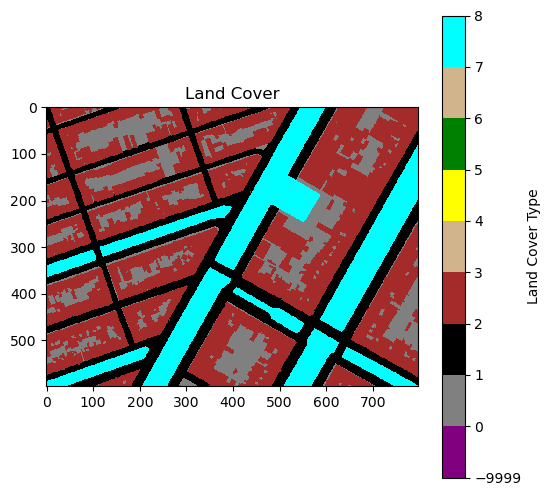

In [55]:
landcover.visualize_raster(landcover.array)